# Image Processing and Nested For Loops
#### Introduction to Programming with Python

## Loading an image file in Python

Working with images in Python requires a module like the `PIL` (Python Imaging Library). To get this installed, you will need to install the `pillow` package. 

Here's some sample code for loading and displaying an image.

You can download the image here: https://raw.githubusercontent.com/ericmanley/IntroToProgrammingWithPython/refs/heads/main/griff.jpg and upload it to Colab in the same way you do with `.txt` files.

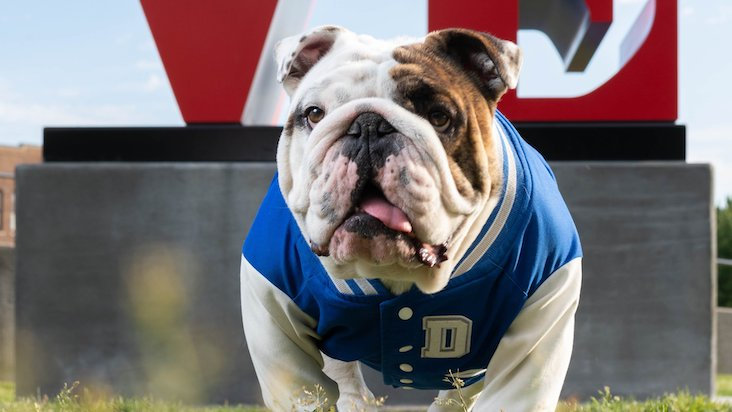

In [1]:
from PIL import Image
from IPython.display import display

with Image.open("griff.jpg") as griff_image:
    display(griff_image)

If you're running this in script mode (not in a Jupyter/Colab notebook), you can instead use the `.show()` method, and the image should open using an image viewing application on your computer.

In [2]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    griff_image.show()

## Image Basics

Digital images are made of a grid of _picture elements_ called __pixels__. If we were to zoom way in on the spot above Griff's left ear, we might notice that the image looks *pixelated* - where you can see each of the pixels represented as a grid of single-colored squares.


<center>
<div>
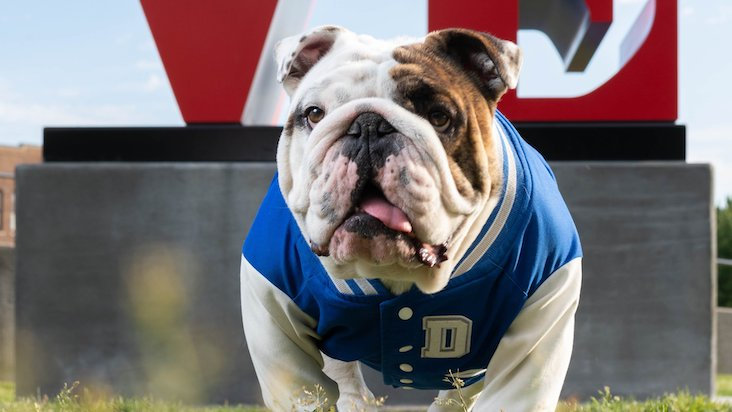
</div>
</center>



<center>
<div>
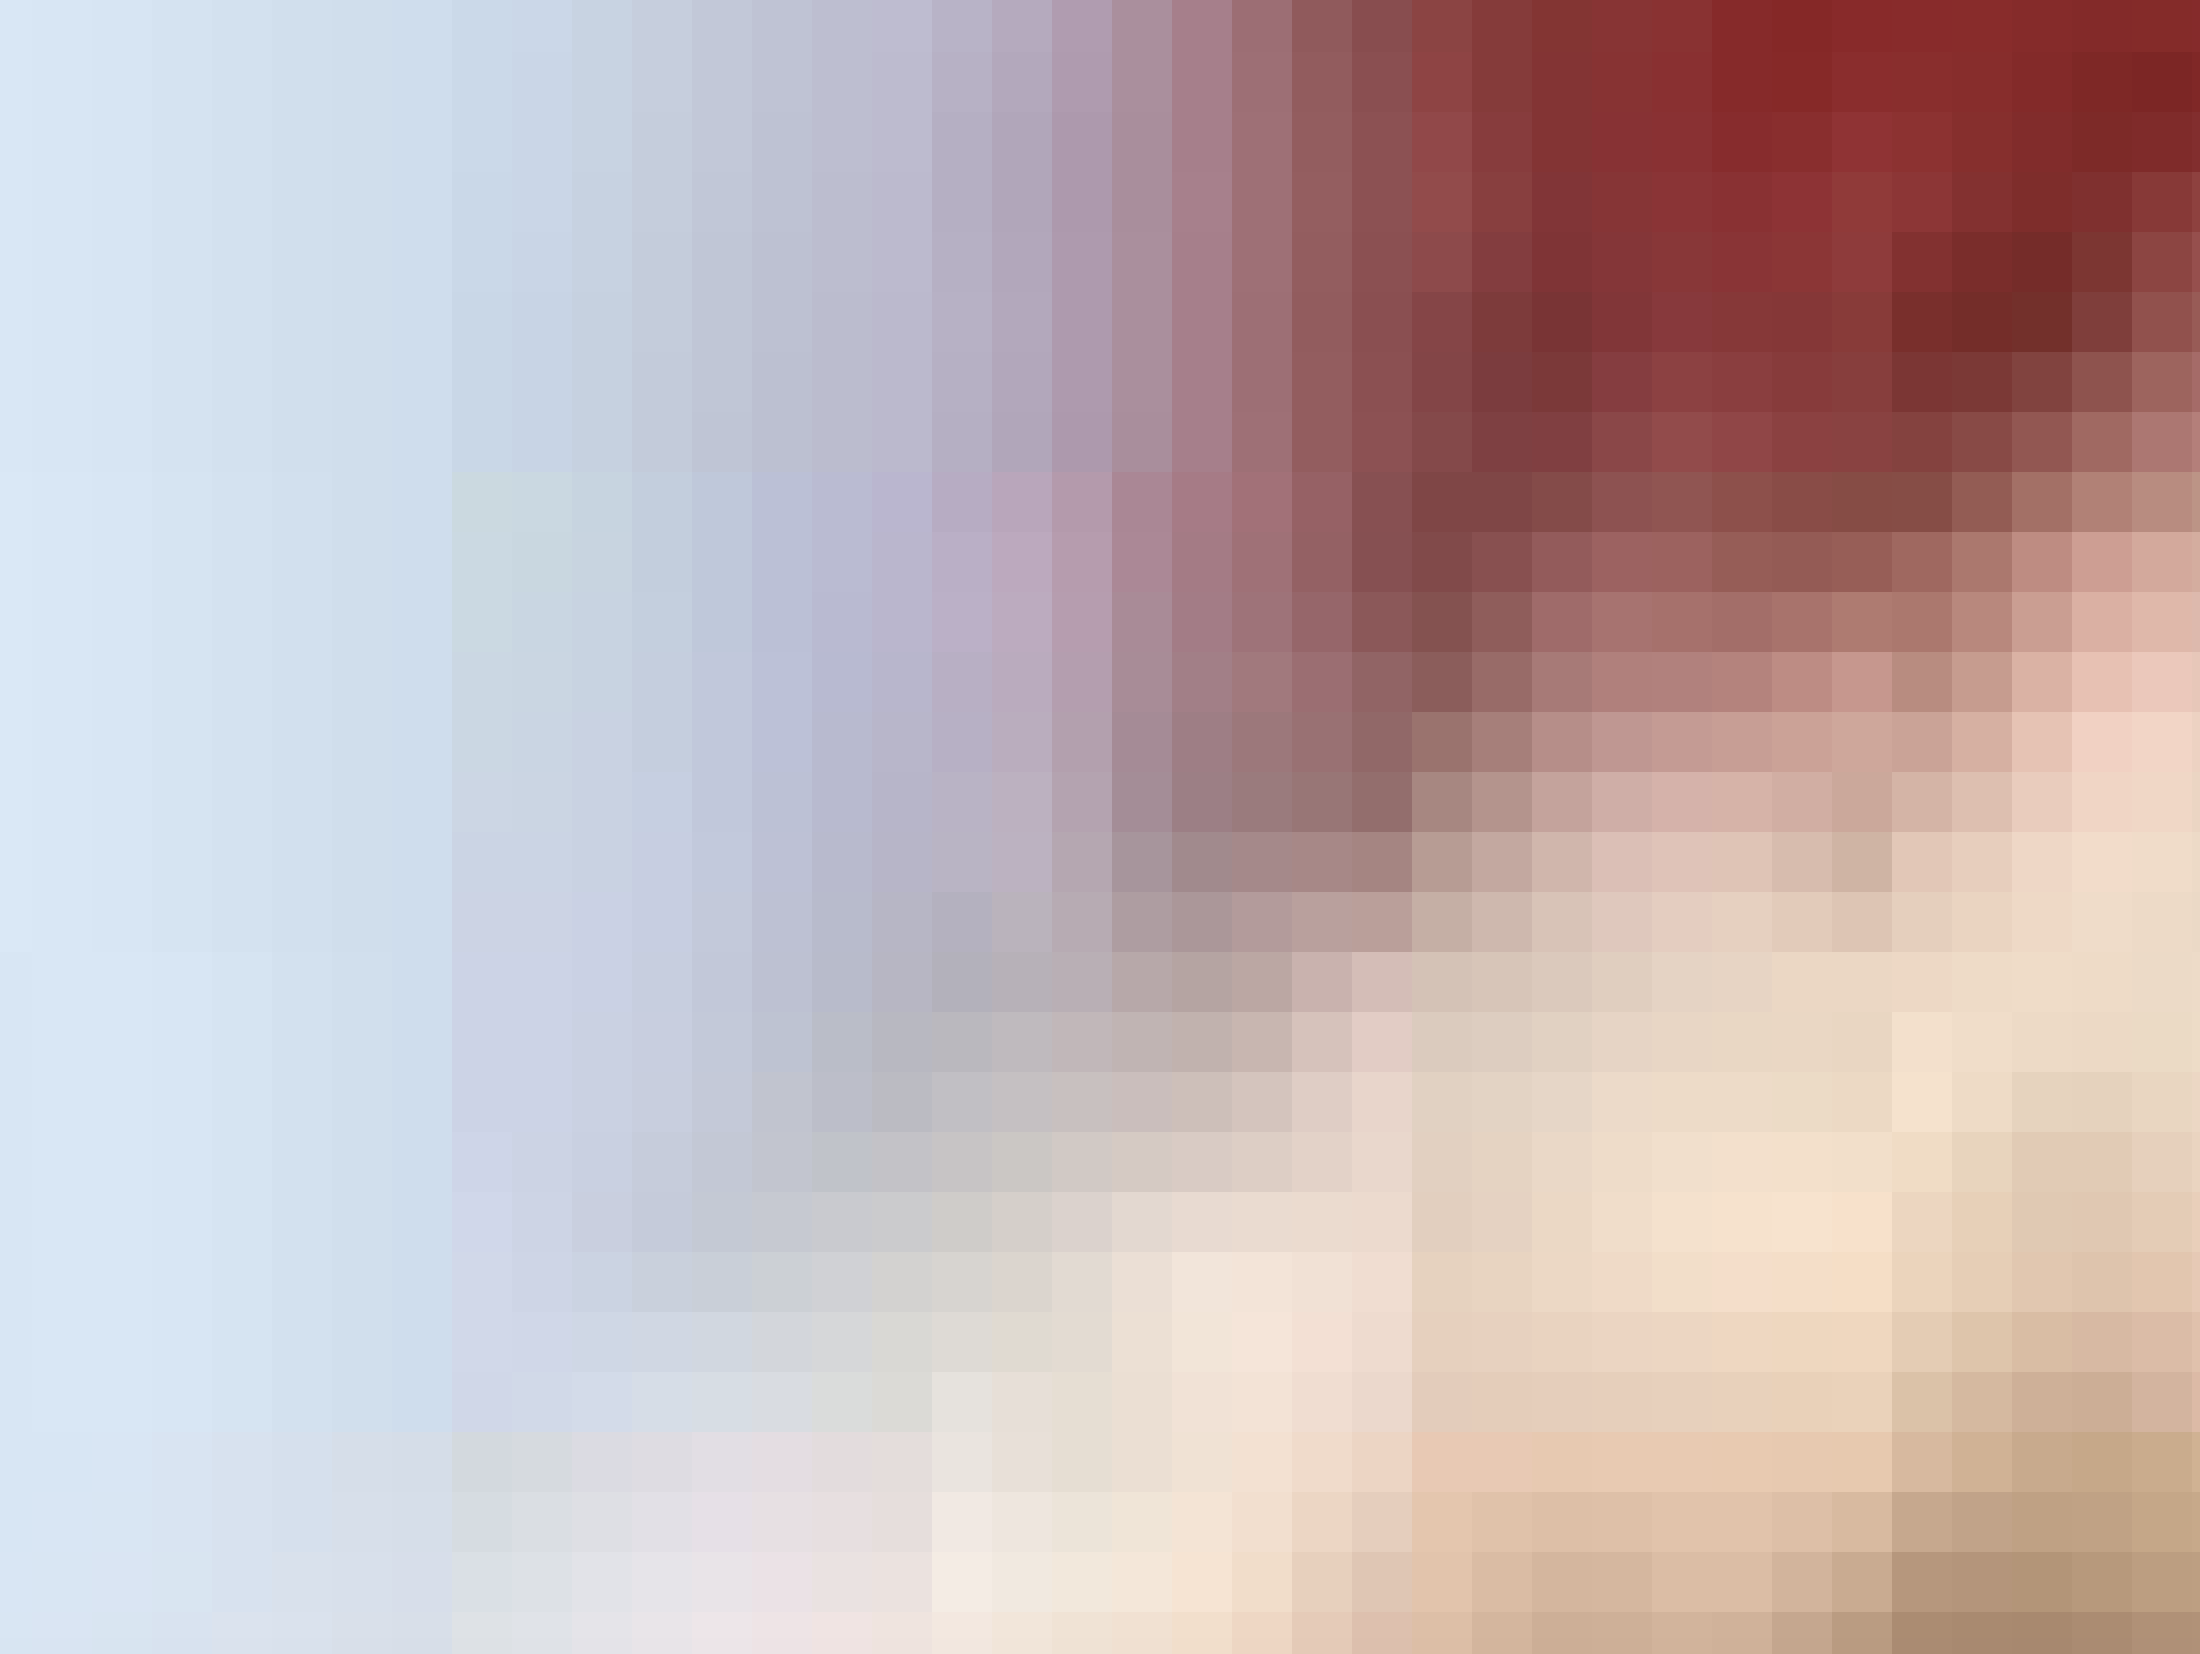
</div>
</center>

Each pixel is stored in the computer as three numbers: a red, a green, and a blue value representing the amount of each primary color of light needed to make that color. These values usually go between 0 and 255.


<center>
<div>
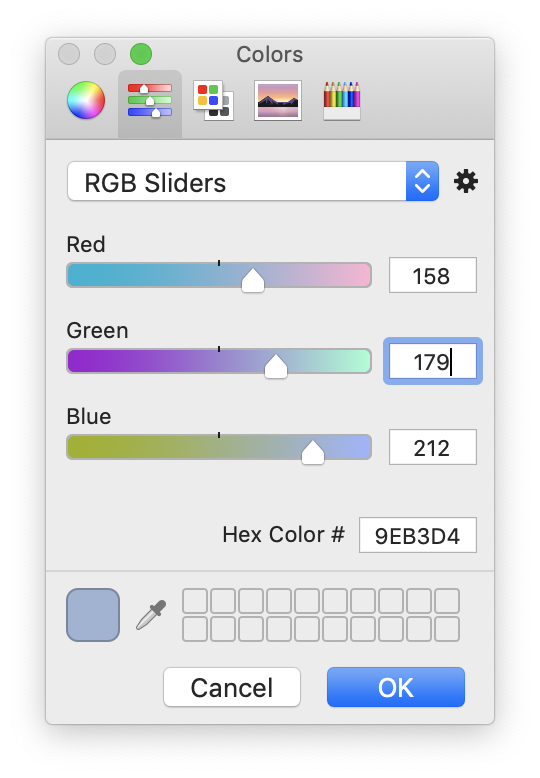
</div>
</center>

_Why 255?_

Numbers are represented in a computer's memory in base-2, or binary notation which is made up of 0s and 1s (binary digits or __bits__) like 00100001 (33) or 11011100 (220). It's common to group bits into groups of 8 called a __byte__, and the biggest number you can represent with 8 bits is 11111111 (255).


## PIL representation of images

an image object in Python has several pieces of data and methods associated with it, and they can do a lot of sophisticated things. For the full reference on using the module, see https://pillow.readthedocs.io/en/stable/

However, we'll use just a few, simple things that will allow us to write custom code that manipulates images.

We can find the image's size with the `size` data attribute of our image, and we can load all the pixels into a variable using `load()`.

In [3]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    #griff_image.show()
    
    print(griff_image.size)

    pixels = griff_image.load()
    
    print(pixels[(0,0)])

(732, 412)
(196, 221, 243)


Notice: images store a lot of their information as tuples.

`size` is a tuple that tells you the number of pixel wide and tall an image is _(width,height)_

`pixels[(0,0)]` is the upper-left pixel in the image - the three values are the red, green, and blue amounts that make up the color stored there
* Wait, we can use a tuple as an *index* in a list? Sort of. The `pixels` object is actually a new type called `PixelAccess`, and it lets you use a tuple as an index. After the next lab, we'll cover a more general data structure that allows you to do this called a *dictionary*

`pixels[(25,50)]` is the pixel in the column 25 (the 26th column from the left) and row 50 (the 51st row from the top)


In [4]:
print(type(pixels))

<class 'PixelAccess'>


You can't change the tuple already in an image

In [5]:
pixels[(25,50)][0] = 100

TypeError: 'tuple' object does not support item assignment

but you can overwrite it with a whole new tuple. We'll change one of the pixels from the sky in the upper-left area of this image to plain black:

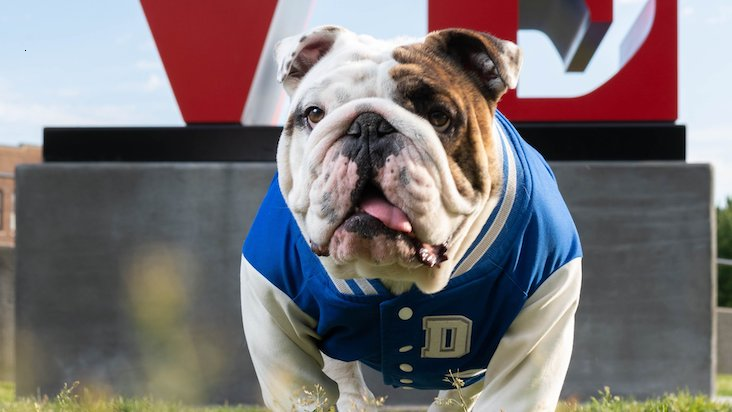

In [6]:
pixels[(25,50)] = (0,0,0) #overwriting pixel 100,200 with black
display(griff_image)

## Using loops for image processing

If I want to loop accross an entire row of an image, I could use `size[0]` (the width - the number of columns) to figure out how many iterations of the loops to run.

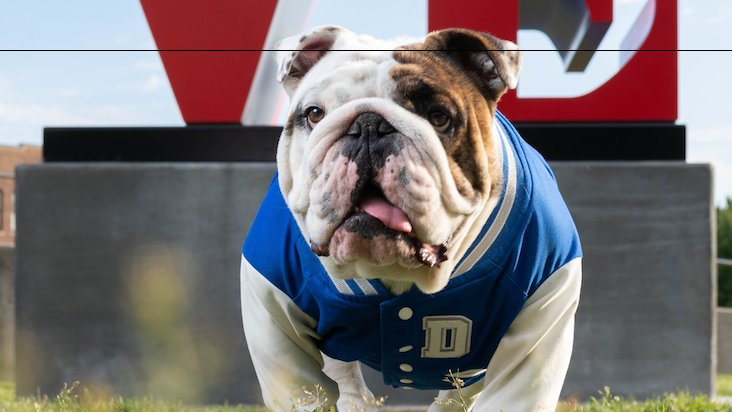

In [7]:
#loop through every column in the image
for p in range(griff_image.size[0]):
    pixels[(p,50)] = (0,0,0) #change the pixel at this column, row 50 to black
    
display(griff_image)

and you could do a column similarly

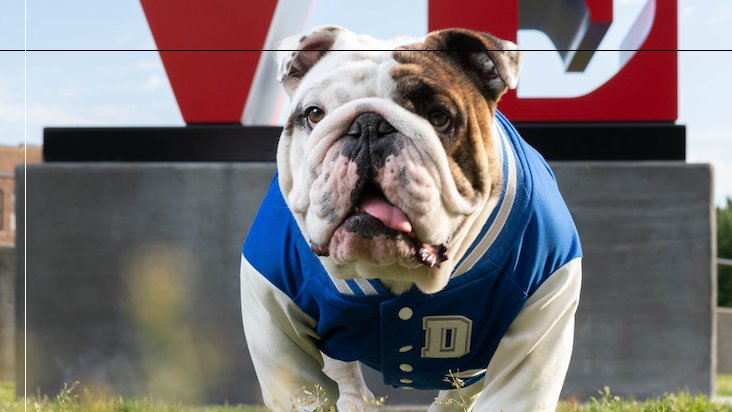

In [8]:
#loop through every row in the image
for p in range(griff_image.size[1]):
    pixels[25,p] = (255,255,255) #change the pixel at this row, column 25 to white
    
display(griff_image)

## Saving the image

To save the image, run the `save()` method.

In [9]:
griff_image.save("griff_with_lines.jpg")

If we wanted a thicker line, we might write

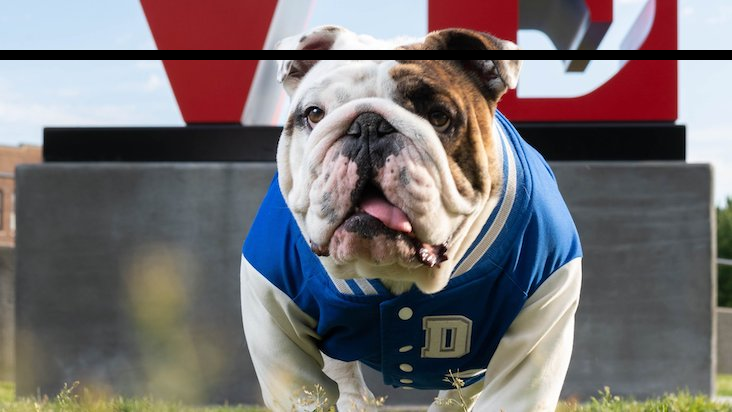

In [10]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    pixels = griff_image.load()
    
for p in range(griff_image.size[0]):
    pixels[p,50] = (0,0,0) #change the pixel at this column, row 50 to black
    pixels[p,51] = (0,0,0)
    pixels[p,52] = (0,0,0)
    pixels[p,53] = (0,0,0)
    pixels[p,54] = (0,0,0)
    pixels[p,55] = (0,0,0)
    pixels[p,56] = (0,0,0)
    pixels[p,57] = (0,0,0)
    pixels[p,58] = (0,0,0)
    pixels[p,59] = (0,0,0)
    
display(griff_image)

Hopefully by now you're thinking "Hey, I could do that with another loop!"

And indeed you can! You can put a loop inside of another loop - this is called a __nested loop__.

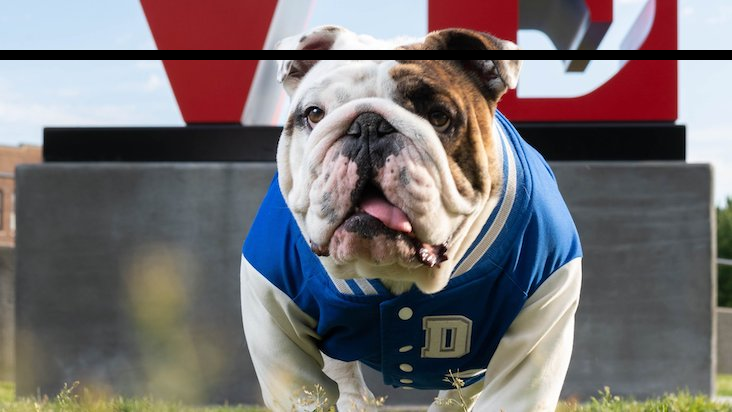

In [11]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    pixels = griff_image.load()
    
for p in range(griff_image.size[0]):
    for r in range(50,60):
        pixels[(p,r)] = (0,0,0)
    
    
    
display(griff_image)

The entire inner loop runs through all its iterations once for every iteration of the outer loop.

If the inner loop runs 10 iterations, and the outer loop runs 732 iterations, then the total number of pixel assignments is $732*10 = 7320$.

## Looping through every pixel in the whole image

Outer loop: run through all the columns - there are `griff_image.size[0]` of them

Inner loop: run through all the rows - there are `griff_image.size[1]` of them

For this one, let's see what happens when we change all the pixels so that every color is the average of all three colors.

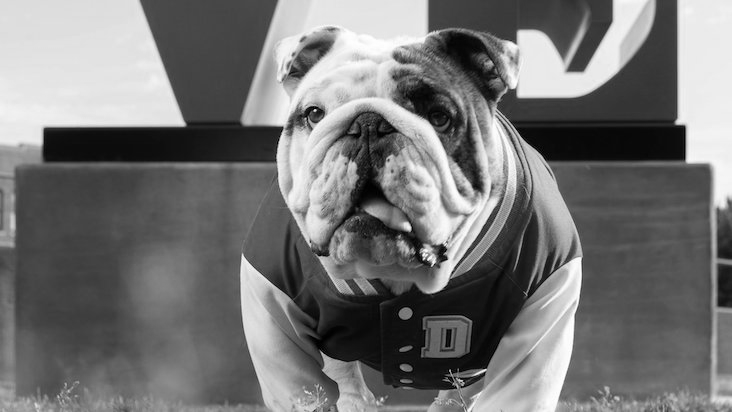

In [12]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    pixels = griff_image.load()
    
for c in range(griff_image.size[0]):
    for r in range(griff_image.size[1]):
        red = pixels[(c,r)][0]
        green = pixels[(c,r)][1]
        blue = pixels[(c,r)][2]
        
        average_pixel_color = (red+green+blue)//3
        
        pixels[(c,r)] = (average_pixel_color,average_pixel_color,average_pixel_color)
    
    
    
display(griff_image)

You can play with the color values to make lots of other filters. Here we'll leave the red and green components alone but double the amount of blue.

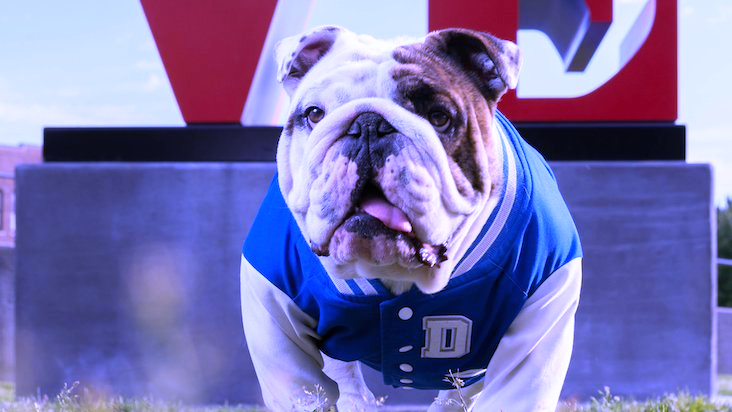

In [13]:
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    pixels = griff_image.load()
    
for c in range(griff_image.size[0]):
    for r in range(griff_image.size[1]):
        red = pixels[(c,r)][0]
        green = pixels[(c,r)][1]
        blue = pixels[(c,r)][2]
        
        
        pixels[(c,r)] = (red,green,blue*2)
    
    
    
display(griff_image)

## Flipping the image horizontally 

Let's talk about a transformation that requires us to move some pixels around.

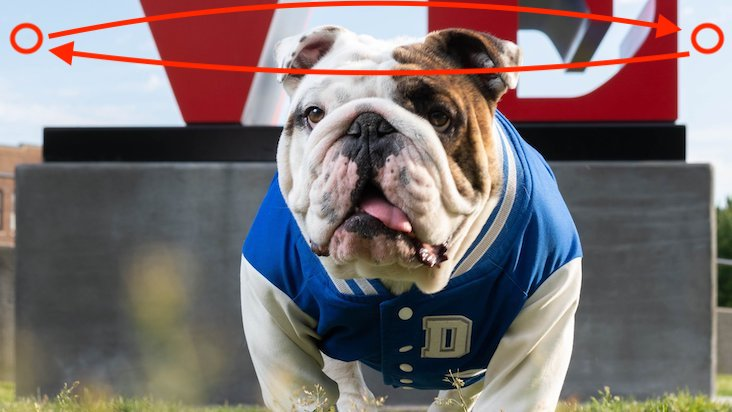

A pixel in location `(c,r)` needs to stay in the same row, but we need to make it's column value `griff_image.size[0]-1-c` - the number of columns minus 1 (because that's the index of the last column) minus c gives us the same location relative to the right edge of the image instead of the left.

We'll swap these two pixels by first saving the pixel that needs to end up of the "left" side with

`leftside = pixels[griff_image.size[0]-1-c,r]`

and then changing the value on the right side to the current left side

`pixels[griff_image.size[0]-1-c,r] = pixels[c,r]`

and then we can change `pixels[c,r]` to the new left side value that we saved

`pixels[c,r] = leftside`

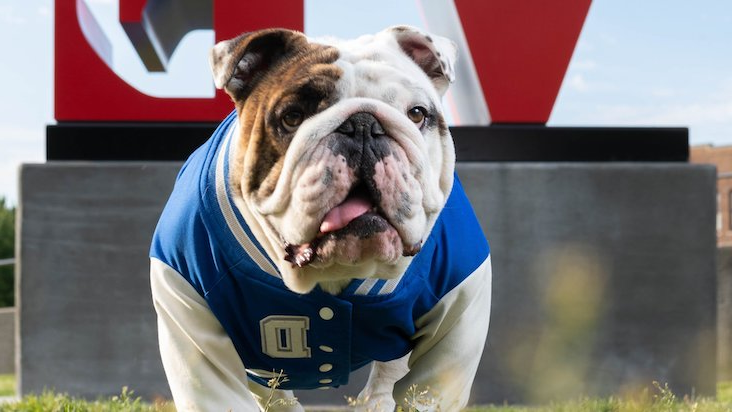

In [14]:
#horizontal flip solution
from PIL import Image

with Image.open("griff.jpg") as griff_image:
    pixels = griff_image.load()
    
for c in range(griff_image.size[0]//2):
    for r in range(griff_image.size[1]):

    
        leftside = pixels[griff_image.size[0]-1-c,r]
        pixels[griff_image.size[0]-1-c,r] = pixels[c,r]
        pixels[c,r] = leftside
    
    
display(griff_image)

**Reflection Question:** In this code, we only looped half-way accross the image with the outer loop

`for c in range(griff_image.size[0]//2):`

but all the way through with the inner loop

`for r in range(griff_image.size[1]):`

Why did we do that? What would have happened if we had looped all the way through with the outer loop or half-way with the inner? Write down the answer in your notes.